# Seminarska naloga 1

Podatke v datoteki `dn3_2_test.npz` analiziraj in najdi čim boljši napovedni model za ciljno spremenljivko. Poročaj o opravljeni analizi, pripravi (preprocesiranju) podatkov, preizkušenih modelih in njihovi točnosti (napak) na testni množici `dn3_2_test.npz`. Zanima nas predvsem točnost modela za razred 1 (bo oseba s plačilom zamujala več kot 90 dni).

Pri tej nalogi lahko namesto zgoraj podane, izbereš svojo podatkovno množico. Preden se podaš v analizo svoje podatkovne množice, pri asistentu _obvezno_ preveri njeno primernost.

Pri tej nalogi želimo zgraditi napovedni model, ki bo napovedal, če bo oseba zamujala s plačilom obroka posojila za več kot 90 (ciljna spremenljivka). Za to bomo uporabili naslednje spremenljivk:
- $x_1$: Procent skupnega stanja na kreditnih karticah in osebnih kreditnih linijah, razen na nepremičninah in brez obročnega odplačevanja
- $x_2$: Starost kreditojemalca v letih
- $x_3$: Število primerov, ko je posojilojemalec v zadnjih dveh letih zamujal 30-59 dni, vendar ne slabše.
- $x_4$: Mesečna plačila dolga, preživnine, življenjskih stroškov, deljena z mesečnim bruto dohodkom
- $x_5$: Mesečni dohodek
- $x_6$: Število odprtih posojil (na obroke, kot je avtomobilsko ali hipotekarno posojilo) in kreditnih linij (npr. kreditne kartice)
- $x_7$: Število primerov, ko je posojilojemalec zamujal z odplačilom 90 dni ali več.
- $x_8$: Število hipotekarnih in nepremičninskih posojil, vključno s stanovanjskimi kreditnimi linijami
- $x_9$: Število primerov, ko je posojilojemalec v zadnjih dveh letih zamujal od 60 do 89 dni, vendar ne slabše.
- $x_{10}$: Število vzdrževanih družinskih članov, razen njega samega (zakonec, otroci itd.)

Opomba: Opise spremenljivk sem direktno prevajal, brez da bi se na to področje spoznal, zato je možno, da je kakšen opis nesmiselen.

# 1. OPIS IN OBDELAVA PODATKOVNE MNOŽICE

In [1]:
import pandas as pd
import numpy as np

train_data = np.load("./dn3_2_train.npz", allow_pickle=True)
test_data = np.load("./dn3_2_test.npz", allow_pickle=True)

x_train = train_data["x"]
y_train = train_data["y"]
x_test = test_data["x"]
y_test = test_data["y"]

names = ["value_of_credit", "%_of_credit", "age", 
         "late_30-59", "payment_ratio", "monthly_income", 
         "number_of_open_credits", "late_>90", "mortgages_and_estate_loans", 
         "late_60-89", "number_of_dependents"]

x_train_pd = pd.DataFrame(x_train, columns=names)
x_test_pd = pd.DataFrame(x_test, columns=names)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

nan_counter_train = round(x_train_pd.isnull().sum()/x_train_pd.shape[0], 10)
nan_counter_test = round(x_test_pd.isnull().sum()/x_test_pd.shape[0], 10)

print(x_train_pd.head(10))
print("-------------------------------------------------------------------")
print(nan_counter_train)
print("-------------------------------------------------------------------")
print(x_train_pd.head())
print("-------------------------------------------------------------------")
print(nan_counter_test)

   value_of_credit  %_of_credit   age  late_30-59  payment_ratio  \
0          22355.0     0.578417  59.0         0.0       0.882057   
1          69715.0     0.771741  72.0         0.0       0.643281   
2          27192.0     0.138764  57.0         1.0       0.138659   
3          53270.0     0.187560  47.0         0.0       0.519775   
4          53780.0     0.024231  32.0         0.0       0.146979   
5          62731.0     0.929010  40.0         2.0       0.461934   
6          75950.0     0.042579  56.0         0.0       0.173917   
7          31632.0     0.024473  41.0         0.0       0.008214   
8          50464.0     0.078050  45.0         0.0       0.569960   
9          81019.0     0.026715  34.0         0.0     153.000000   

   monthly_income  number_of_open_credits  late_>90  \
0          2780.0                    11.0       0.0   
1          7083.0                    15.0       0.0   
2          5920.0                    13.0       0.0   
3          8014.0              

In [2]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
x_train_filled = imputer.fit_transform(x_train_pd)
x_test_filled = imputer.transform(x_test_pd)

x_train_pd_filled = pd.DataFrame(x_train_filled, columns=names)
x_test_pd_filled = pd.DataFrame(x_test_filled, columns=names)

x_train_pd_filled.to_csv("0x_train.csv", index=False)
x_test_pd_filled.to_csv("0x_test.csv", index=False)

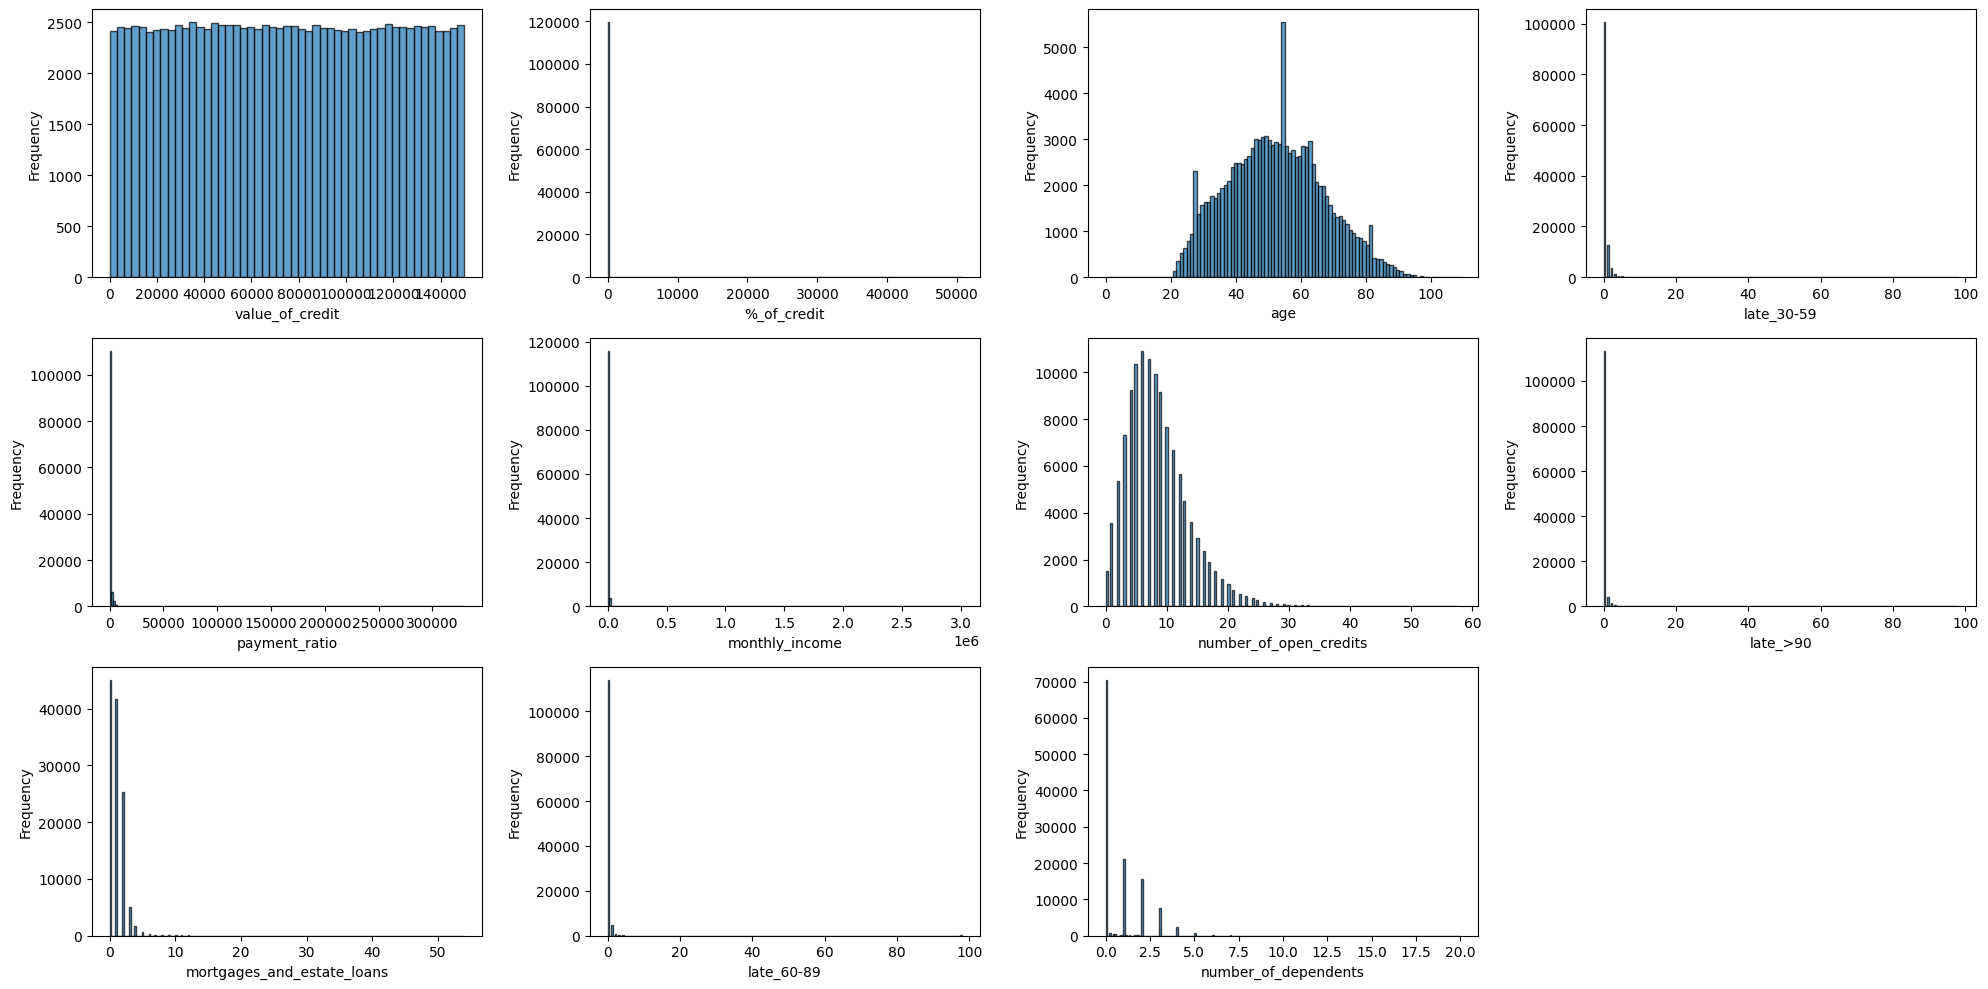

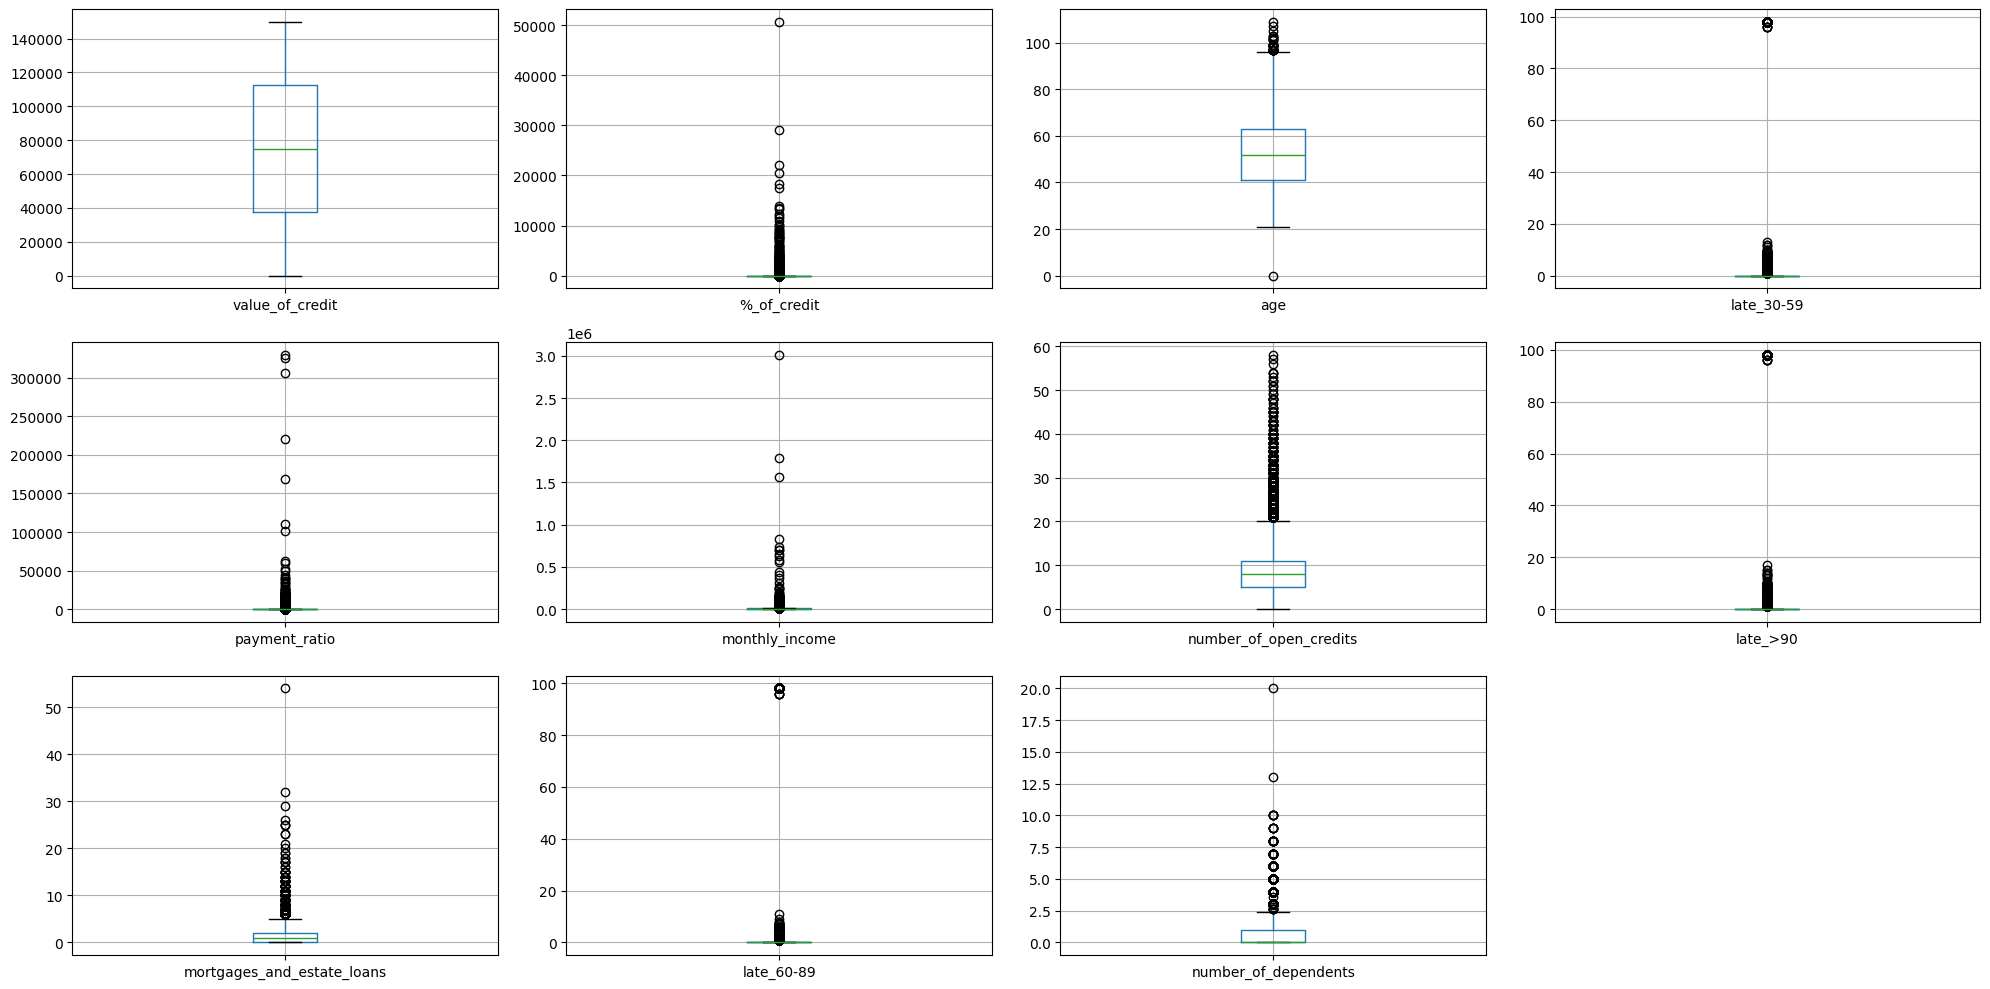

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X_train = pd.read_csv("0x_train.csv")
X_test = pd.read_csv("0x_test.csv")

def optimal_bins(data):
    bin_edges = np.histogram_bin_edges(data, bins='scott')
    return len(bin_edges) - 1

num_columns = len(X_train.columns)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i, column in enumerate(X_train.columns):
    bins = optimal_bins(X_train[column])
    bins_min = min(bins, 200)
    X_train[column].plot.hist(bins=bins_min, ax=axes[i], alpha=0.7, edgecolor='black')
    axes[i].set_xlabel(column)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i, column in enumerate(X_train.columns):
    X_train.boxplot(column=column, ax=axes[i]) 

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [4]:
from scipy.stats import zscore

z_scores = np.abs(zscore(X_train))

threshold = 3
mask = (z_scores < threshold).all(axis=1)

X_cleaned = []
y_cleaned = []

for j in range(len(mask)):
    if mask[j]:
        X_cleaned.append([X_train[names[i]][j] for i in range(len(X_train.columns))])
        y_cleaned.append([y_train[0][j]])
    else:
        continue
X_cleaned = pd.DataFrame(X_cleaned, columns=names)
y_cleaned = pd.DataFrame(y_cleaned, columns=["y"])

print(f"BEFORE: {len(X_train)}")
print(f"AFTER: {len(X_cleaned)}")
print(round(len(X_cleaned)/len(X_train), 4))


BEFORE: 120000
AFTER: 115723
0.9644


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_norm = pd.DataFrame(scaler.fit_transform(X_cleaned), columns=names)
X_test_norm = pd.DataFrame(scaler.transform(X_test), columns=names)

value_of_credit               0.002
%_of_credit                   0.008
age                          -0.115
late_30-59                    0.274
payment_ratio                -0.018
monthly_income               -0.041
number_of_open_credits       -0.033
late_>90                      0.328
mortgages_and_estate_loans   -0.027
late_60-89                    0.272
number_of_dependents          0.049
Name: y, dtype: float64


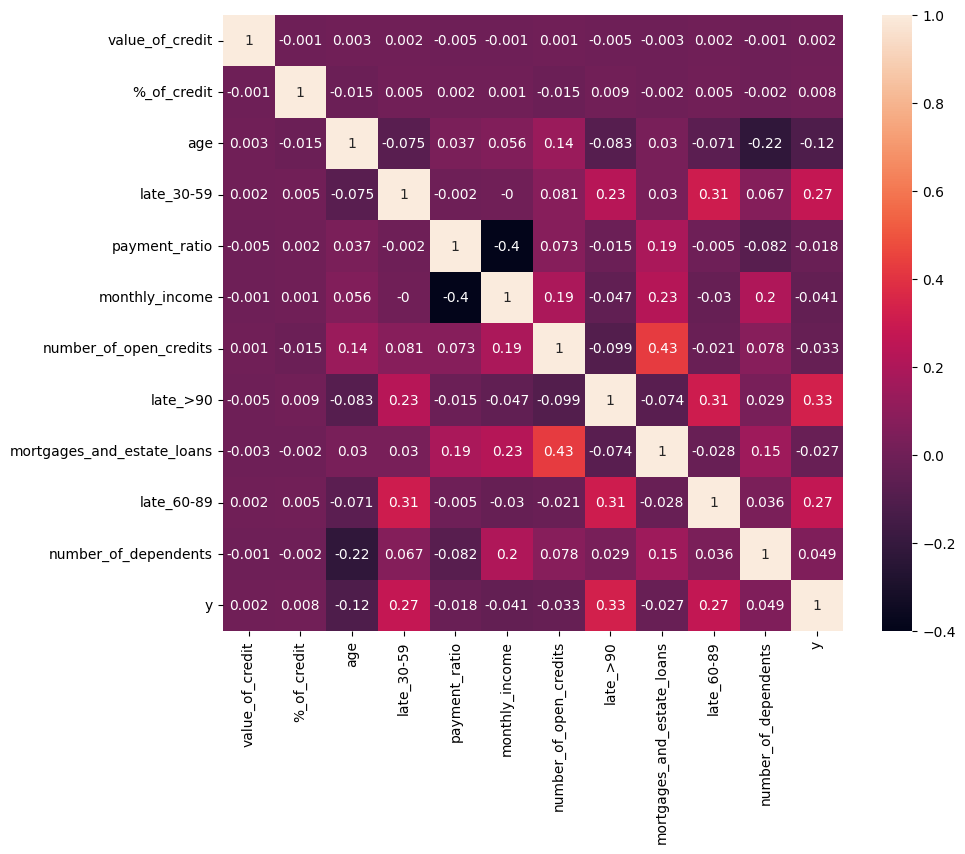

In [6]:
import seaborn as sns

data_train = X_train_norm.join(y_cleaned["y"])
corr_train = np.round(data_train.corr(), 3)
print((corr_train["y"]).drop("y"))

plt.subplots(figsize = (10, 8))
sns.heatmap(corr_train, annot = True)
plt.show()

In [7]:
im_gr1 = ["late_30-59", "late_>90", "late_60-89"]
im_gr2 = ["age", "late_30-59", "payment_ratio", "monthly_income", "number_of_open_credits", "late_>90", "mortgages_and_estate_loans", "late_60-89", "number_of_dependents"]
im_gr3 = names 

In [8]:
print((y_train == 1).sum())
print((y_train == 0).sum())
print(round((((y_train == 1).sum())[0])/(((y_train == 1).sum())[0] + ((y_train == 0).sum())[0]), 5))

0    8120
dtype: int64
0    111880
dtype: int64
0.06767


In [9]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

def resample_data(X, y, strategy='smote', sampling_strategy='auto', random_state=42):
    
    if strategy not in ['over', 'under', 'smote']:
        raise ValueError("Strategy must be 'oversample', 'undersample', or 'smote'")
    
    if strategy == 'over':
        resampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=random_state)
    elif strategy == 'under':
        resampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=random_state)
    elif strategy == 'smote':
        resampler = SMOTE(sampling_strategy=sampling_strategy, random_state=random_state)
    
    X_resampled, y_resampled = resampler.fit_resample(X, y)
    
    return X_resampled, y_resampled

X_train_over, y_train_over = resample_data(X_train_norm, y_cleaned, "over")
X_train_under, y_train_under = resample_data(X_train_norm, y_cleaned, "under")
X_train_smote, y_train_smote = resample_data(X_train_norm, y_cleaned, "smote")

X_test_norm.to_csv("X_test.csv", index = False)
y_test.to_csv("y_test.csv", index = False)

y_train_smote.to_csv("y_train_smote.csv", index = False)
y_train_under.to_csv("y_train_under.csv", index = False)
y_train_over.to_csv("y_train_over.csv", index = False)
y_cleaned.to_csv("y_train_normal.csv", index = False)

X_train_smote.to_csv("X_train_smote.csv", index = False)
X_train_under.to_csv("X_train_under.csv", index = False)
X_train_over.to_csv("X_train_over.csv", index = False)
X_train_norm.to_csv("X_train_normal.csv", index = False)


# 2. KONSTRUKCIJA, EVALVACIJA IN IZBIRA NAPOVEDNEGA MODELA

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import json

groups = [im_gr1, im_gr2, im_gr3]

X_train_smote = pd.read_csv("X_train_smote.csv")
y_train_smote = (pd.read_csv("y_train_smote.csv"))["y"]

X_train_under = pd.read_csv("X_train_under.csv")
y_train_under = (pd.read_csv("y_train_under.csv"))["y"]

X_train_over = pd.read_csv("X_train_over.csv")
y_train_over = (pd.read_csv("y_train_over.csv"))["y"]

X_train_norm = pd.read_csv("X_train_normal.csv")
y_train_norm = (pd.read_csv("y_train_normal.csv"))["y"]

X_test = pd.read_csv("X_test.csv")
y_test = (pd.read_csv("y_test.csv"))["0"]


class BatchLoggingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1} ended. Loss: {logs['loss']}, Accuracy: {logs['accuracy']}")

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
}

#def create_nn_model1(input_shape):
#    model = Sequential([
#        Dense(512, input_shape=(input_shape,), activation='relu'),
#        BatchNormalization(),
#        Dropout(0.4),
#        Dense(256, activation='relu'),
#        Dropout(0.4),
#        Dense(128, activation='relu'),
#        Dropout(0.4),
#        Dense(64, activation='relu'),
#        Dropout(0.4),
#        Dense(64, activation='relu'),
#        Dropout(0.4),
#        Dense(32, activation='relu'),
#        Dropout(0.4),
#        Dense(16, activation='relu'),
#        BatchNormalization(),
#        Dropout(0.4),
#        Dense(1, activation='sigmoid')
#    ])
#    model.compile(
#        optimizer='adam',
#        loss='binary_crossentropy',
#        metrics=['accuracy']
#    )
#    return model

def create_nn_model2(input_shape):
    model = Sequential([
        Dense(256, input_shape=(input_shape,), activation='leaky_relu', kernel_initializer='he_normal'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='leaky_relu', kernel_initializer='he_normal'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='leaky_relu', kernel_initializer='he_normal'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(16, activation='leaky_relu', kernel_initializer='he_normal'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

#def create_nn_model3(input_shape):
#    model = Sequential([
#        Dense(256, input_shape=(input_shape,), activation='relu'),
#        BatchNormalization(),
#        Dense(128, activation='relu'),
#        BatchNormalization(),
#        Dense(64, activation='relu'),
#        BatchNormalization(),
#        Dropout(0.7),
#        Dense(32, activation='leaky_relu', kernel_initializer='he_normal'),
#        BatchNormalization(),
#        Dropout(0.7),
#        Dense(32, activation='relu'),
#        BatchNormalization(),
#        Dropout(0.7),
#        Dense(32, activation='leaky_relu', kernel_initializer='he_normal'),
#        BatchNormalization(),
#        Dropout(0.7),
#        Dense(16, activation='leaky_relu', kernel_initializer='he_normal'),
#        BatchNormalization(),
#        Dropout(0.7),
#        Dense(1, activation='sigmoid')
#    ])
#    model.compile(
#        optimizer='adam',
#        loss='binary_crossentropy',
#        metrics=['accuracy']
#    )
#    return model

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

for i in range(len(groups)):
    results_norm = {}
    results_smote = {}
    results_over = {}
    results_under = {}

    for name, model in models.items():

        accuracy_norm, precision_norm, recall_norm, f1_norm = evaluate_model(model, X_train_norm[groups[i]], y_train_norm, X_test[groups[i]], y_test)
        accuracy_under, precision_under, recall_under, f1_under = evaluate_model(model, X_train_under[groups[i]], y_train_under, X_test[groups[i]], y_test)
        accuracy_over, precision_over, recall_over, f1_over = evaluate_model(model, X_train_over[groups[i]], y_train_over, X_test[groups[i]], y_test)
        accuracy_smote, precision_smote, recall_smote, f1_smote = evaluate_model(model, X_train_smote[groups[i]], y_train_smote, X_test[groups[i]], y_test)

        results_norm[name] = {
            "Accuracy": accuracy_norm,
            "Precision": precision_norm,
            "Recall": recall_norm,
            "F1 Score": f1_norm
        }
        results_over[name] = {
            "Accuracy": accuracy_over,
            "Precision": precision_over,
            "Recall": recall_over,
            "F1 Score": f1_over
        }
        results_under[name] = {
            "Accuracy": accuracy_under,
            "Precision": precision_under,
            "Recall": recall_under,
            "F1 Score": f1_under
        }
        results_smote[name] = {
            "Accuracy": accuracy_smote,
            "Precision": precision_smote,
            "Recall": recall_smote,
            "F1 Score": f1_smote
        }
        print(f"----evaluating {name} for group {i+1} done----")

    #nn_model_norm1 = create_nn_model1(X_train_norm[groups[i]].shape[1])
    #nn_model_over1 = create_nn_model1(X_train_over[groups[i]].shape[1])
    #nn_model_under1 = create_nn_model1(X_train_under[groups[i]].shape[1])
    #nn_model_smote1 = create_nn_model1(X_train_smote[groups[i]].shape[1])

    nn_model_norm2 = create_nn_model2(X_train_norm[groups[i]].shape[1])
    nn_model_over2 = create_nn_model2(X_train_over[groups[i]].shape[1])
    nn_model_under2 = create_nn_model2(X_train_under[groups[i]].shape[1])
    nn_model_smote2 = create_nn_model2(X_train_smote[groups[i]].shape[1])

    #nn_model_norm3 = create_nn_model3(X_train_norm[groups[i]].shape[1])
    #nn_model_over3 = create_nn_model3(X_train_over[groups[i]].shape[1])
    #nn_model_under3 = create_nn_model3(X_train_under[groups[i]].shape[1])
    #nn_model_smote3 = create_nn_model3(X_train_smote[groups[i]].shape[1])

    #batch_logger_norm1 = BatchLoggingCallback()
    #batch_logger_under1 = BatchLoggingCallback()
    #batch_logger_over1 = BatchLoggingCallback()
    #batch_logger_smote1 = BatchLoggingCallback()

    batch_logger_norm2 = BatchLoggingCallback()
    batch_logger_under2 = BatchLoggingCallback()
    batch_logger_over2 = BatchLoggingCallback()
    batch_logger_smote2 = BatchLoggingCallback()

    #batch_logger_norm3 = BatchLoggingCallback()
    #batch_logger_under3 = BatchLoggingCallback()
    #batch_logger_over3 = BatchLoggingCallback()
    #batch_logger_smote3 = BatchLoggingCallback()


    #nn_models_smote = [nn_model_smote1, nn_model_smote2, nn_model_smote3]
    #nn_models_norm = [nn_model_norm1, nn_model_norm2, nn_model_norm3]
    #nn_models_under = [nn_model_under1, nn_model_under2, nn_model_under3]
    #nn_models_over = [nn_model_over1, nn_model_over2, nn_model_over3]
#
    #batch_loggers_smote = [batch_logger_smote1, batch_logger_smote2, batch_logger_smote3]
    #batch_loggers_norm = [batch_logger_norm1, batch_logger_norm2, batch_logger_norm3]
    #batch_loggers_over = [batch_logger_over1, batch_logger_over2, batch_logger_over3]
    #batch_loggers_under = [batch_logger_under1, batch_logger_under2, batch_logger_under3]

    nn_models_smote = [nn_model_smote2]
    nn_models_norm = [nn_model_norm2]
    nn_models_under = [nn_model_under2]
    nn_models_over = [nn_model_over2]

    batch_loggers_smote = [batch_logger_smote2]
    batch_loggers_norm = [batch_logger_norm2]
    batch_loggers_over = [batch_logger_over2]
    batch_loggers_under = [batch_logger_under2]

    for j in range(1):
        (nn_models_norm[j]).fit(X_train_norm[groups[i]], y_train_norm, epochs=12, batch_size=1000, verbose=0, callbacks=[batch_loggers_norm[j]])
        (nn_models_under[j]).fit(X_train_under[groups[i]], y_train_under, epochs=12, batch_size=1000, verbose=0, callbacks=[batch_loggers_under[j]])
        (nn_models_over[j]).fit(X_train_over[groups[i]], y_train_over, epochs=12, batch_size=1000, verbose=0, callbacks=[batch_loggers_over[j]])
        (nn_models_smote[j]).fit(X_train_smote[groups[i]], y_train_smote, epochs=12, batch_size=1000, verbose=0, callbacks=[batch_loggers_smote[j]])
        
        y_pred_nn_norm = ((nn_models_norm[j]).predict(X_test[groups[i]]) > 0.5).astype("int32")
        y_pred_nn_over = ((nn_models_over[j]).predict(X_test[groups[i]]) > 0.5).astype("int32")
        y_pred_nn_under = ((nn_models_under[j]).predict(X_test[groups[i]]) > 0.5).astype("int32")
        y_pred_nn_smote = ((nn_models_smote[j]).predict(X_test[groups[i]]) > 0.5).astype("int32")

        accuracy_norm = accuracy_score(y_test, y_pred_nn_norm)
        precision_norm = precision_score(y_test, y_pred_nn_norm, average='weighted')
        recall_norm = recall_score(y_test, y_pred_nn_norm, average='weighted')
        f1_norm = f1_score(y_test, y_pred_nn_norm, average='weighted')

        accuracy_under = accuracy_score(y_test, y_pred_nn_under)
        precision_under = precision_score(y_test, y_pred_nn_under, average='weighted')
        recall_under = recall_score(y_test, y_pred_nn_under, average='weighted')
        f1_under = f1_score(y_test, y_pred_nn_under, average='weighted')

        accuracy_over = accuracy_score(y_test, y_pred_nn_over)
        precision_over = precision_score(y_test, y_pred_nn_over, average='weighted')
        recall_over = recall_score(y_test, y_pred_nn_over, average='weighted')
        f1_over = f1_score(y_test, y_pred_nn_over, average='weighted')

        accuracy_smote = accuracy_score(y_test, y_pred_nn_smote)
        precision_smote = precision_score(y_test, y_pred_nn_smote, average='weighted')
        recall_smote = recall_score(y_test, y_pred_nn_smote, average='weighted')
        f1_smote = f1_score(y_test, y_pred_nn_smote, average='weighted')

        results_norm[f"Best Neural Network"] = {
            "Accuracy": accuracy_norm,
            "Precision": precision_norm,
            "Recall": recall_norm,
            "F1 Score": f1_norm
        }
        results_under[f"Best Neural Network"] = {
            "Accuracy": accuracy_under,
            "Precision": precision_under,
            "Recall": recall_under,
            "F1 Score": f1_under
        }
        results_over[f"Best Neural Network"] = {
            "Accuracy": accuracy_over,
            "Precision": precision_over,
            "Recall": recall_over,
            "F1 Score": f1_over
        }
        results_smote[f"Best Neural Network"] = {
            "Accuracy": accuracy_smote,
            "Precision": precision_smote,
            "Recall": recall_smote,
            "F1 Score": f1_smote
        }

    with open(f"res_norm{i+1}.txt", 'w') as file:
        json.dump(results_norm, file)
    with open(f"res_over{i+1}.txt", 'w') as file:
        json.dump(results_over, file)
    with open(f"res_under{i+1}.txt", 'w') as file:
        json.dump(results_under, file)
    with open(f"res_smote{i+1}.txt", 'w') as file:
        json.dump(results_smote, file)

print("-----------------''---------DONE----------------------------------------")#

----evaluating Decision Tree for group 1 done----
----evaluating Random Forest for group 1 done----
----evaluating K-Nearest Neighbors for group 1 done----
----evaluating Logistic Regression for group 1 done----
----evaluating Gradient Boosting Classifier for group 1 done----
Epoch 1 ended. Loss: 0.73128342628479, Accuracy: 0.655651867389679
Epoch 2 ended. Loss: 0.48173895478248596, Accuracy: 0.898991584777832
Epoch 3 ended. Loss: 0.3700949549674988, Accuracy: 0.9241551160812378
Epoch 4 ended. Loss: 0.3128298819065094, Accuracy: 0.9300657510757446
Epoch 5 ended. Loss: 0.28528091311454773, Accuracy: 0.9315606951713562
Epoch 6 ended. Loss: 0.27191686630249023, Accuracy: 0.9326408505439758
Epoch 7 ended. Loss: 0.2587933838367462, Accuracy: 0.9335654973983765
Epoch 8 ended. Loss: 0.24997618794441223, Accuracy: 0.9338074326515198
Epoch 9 ended. Loss: 0.2421264350414276, Accuracy: 0.9339889287948608
Epoch 10 ended. Loss: 0.23678752779960632, Accuracy: 0.9343691468238831
Epoch 11 ended. Loss:

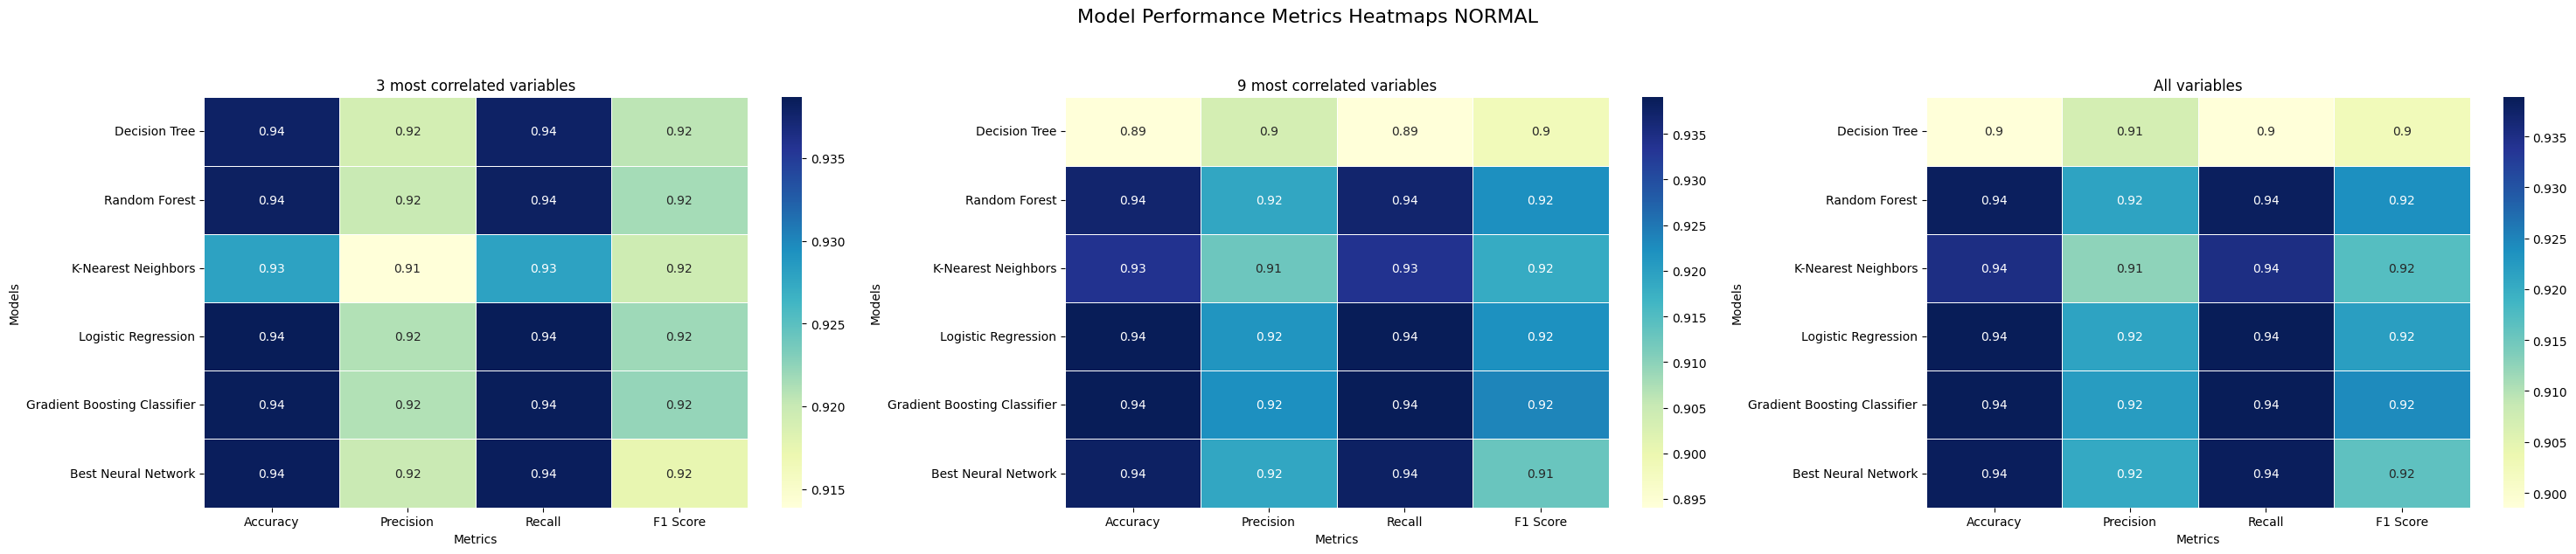

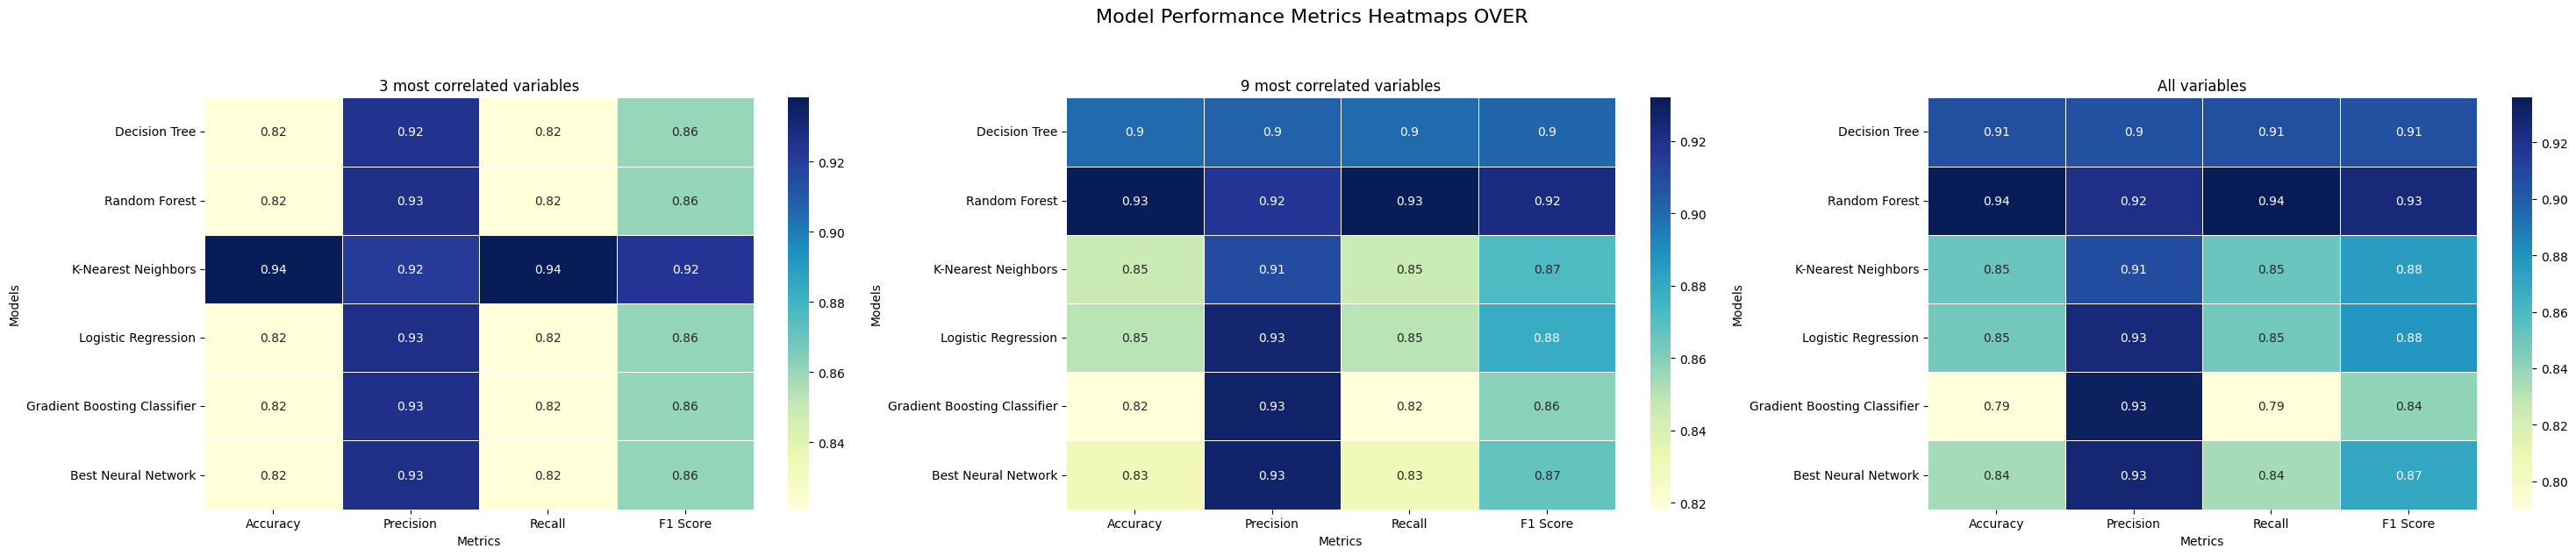

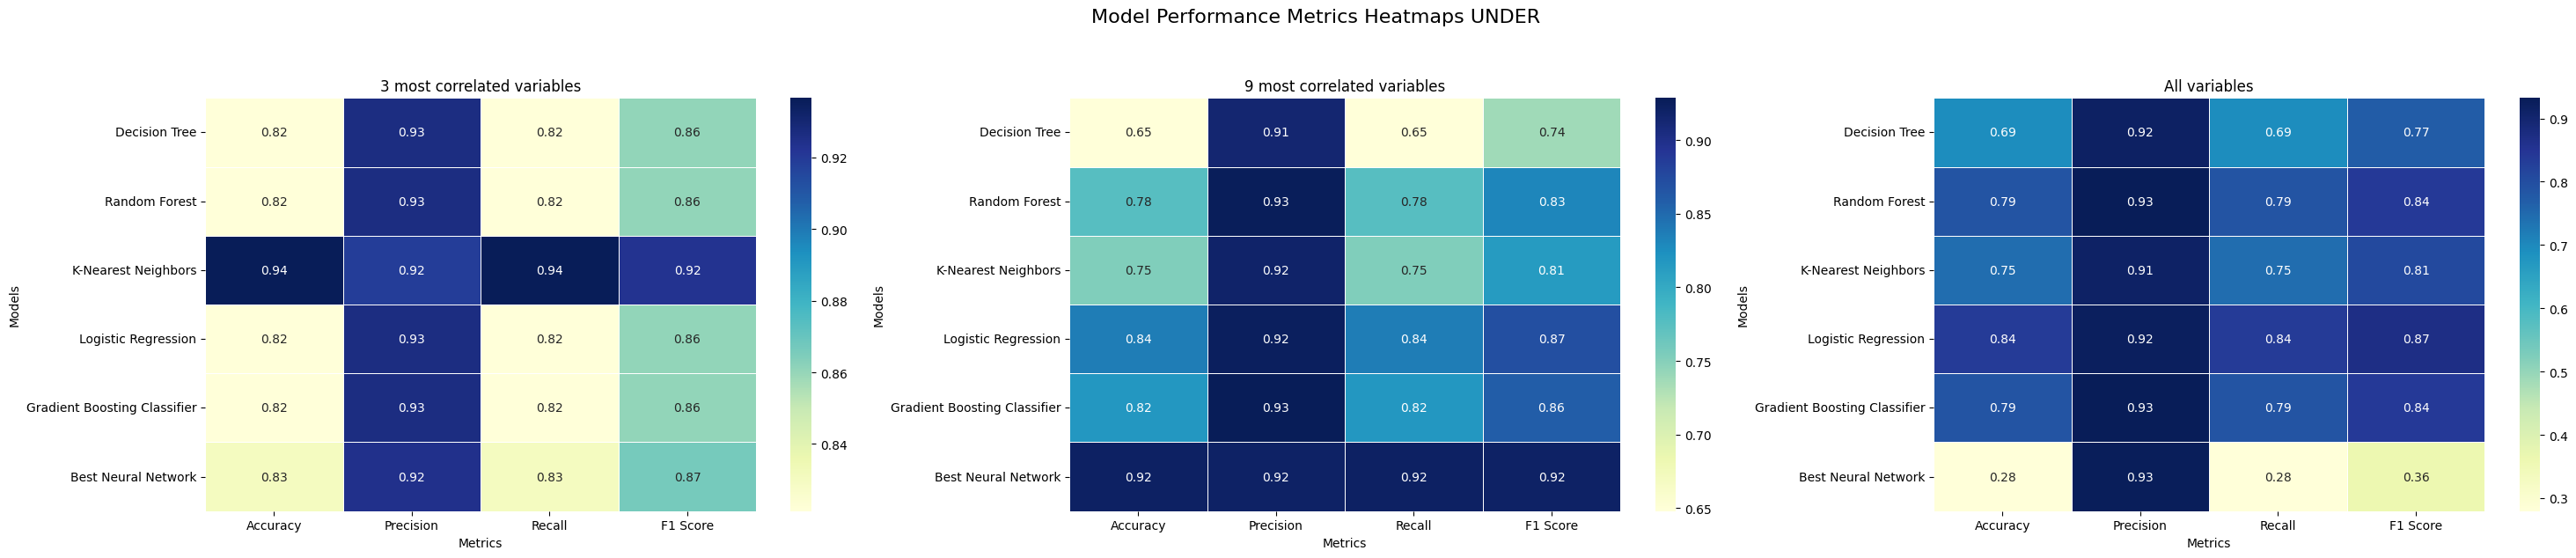

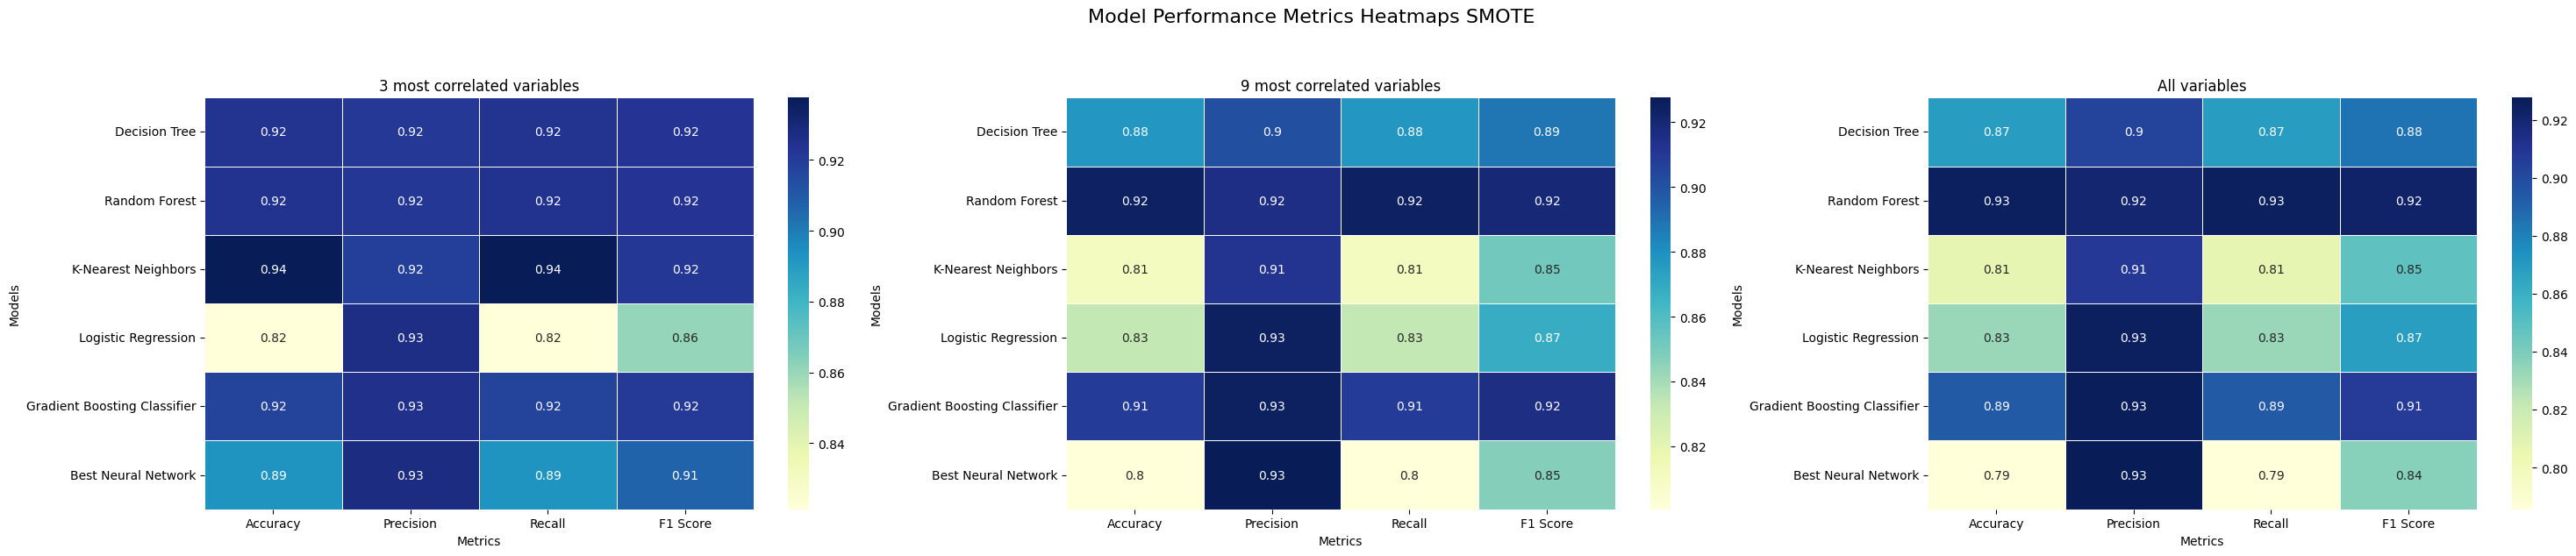

In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

with open("res_norm1.txt", 'r') as file:
    res_norm1 = json.load(file)

with open("res_over1.txt", 'r') as file:
    res_over1 = json.load(file)

with open("res_under1.txt", 'r') as file:
    res_under1 = json.load(file)

with open("res_smote1.txt", 'r') as file:
    res_smote1 = json.load(file)
    

with open("res_norm2.txt", 'r') as file:
    res_norm2 = json.load(file)

with open("res_over2.txt", 'r') as file:
    res_over2 = json.load(file)

with open("res_under2.txt", 'r') as file:
    res_under2 = json.load(file)

with open("res_smote2.txt", 'r') as file:
    res_smote2 = json.load(file)


with open("res_norm3.txt", 'r') as file:
    res_norm3 = json.load(file)

with open("res_over3.txt", 'r') as file:
    res_over3 = json.load(file)

with open("res_under3.txt", 'r') as file:
    res_under3 = json.load(file)

with open("res_smote3.txt", 'r') as file:
    res_smote3 = json.load(file)


df_norm1 = (pd.DataFrame(res_norm1)).transpose()
df_over1 = (pd.DataFrame(res_over1)).transpose()
df_under1 = (pd.DataFrame(res_under1)).transpose()
df_smote1 = (pd.DataFrame(res_smote1)).transpose()

df_norm2 = (pd.DataFrame(res_norm2)).transpose()
df_over2 = (pd.DataFrame(res_over2)).transpose()
df_under2 = (pd.DataFrame(res_under2)).transpose()
df_smote2 = (pd.DataFrame(res_smote2)).transpose()

df_norm3 = (pd.DataFrame(res_norm3)).transpose()
df_over3 = (pd.DataFrame(res_over3)).transpose()
df_under3 = (pd.DataFrame(res_under3)).transpose()
df_smote3 = (pd.DataFrame(res_smote3)).transpose()


fig, axes = plt.subplots(1, 3, figsize=(30, 6))

sns.heatmap(df_norm1, annot=True, cmap="YlGnBu", linewidths=.5, ax=axes[0])
axes[0].set_title('3 most correlated variables')
axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Models')
sns.heatmap(df_norm2, annot=True, cmap="YlGnBu", linewidths=.5, ax=axes[1])
axes[1].set_title('9 most correlated variables')
axes[1].set_xlabel('Metrics')
axes[1].set_ylabel('Models')
sns.heatmap(df_norm3, annot=True, cmap="YlGnBu", linewidths=.5, ax=axes[2])
axes[2].set_title('All variables')
axes[2].set_xlabel('Metrics')
axes[2].set_ylabel('Models')

plt.suptitle('Model Performance Metrics Heatmaps NORMAL', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()



fig, axes = plt.subplots(1, 3, figsize=(30, 6))

sns.heatmap(df_over1, annot=True, cmap="YlGnBu", linewidths=.5, ax=axes[0])
axes[0].set_title('3 most correlated variables')
axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Models')
sns.heatmap(df_over2, annot=True, cmap="YlGnBu", linewidths=.5, ax=axes[1])
axes[1].set_title('9 most correlated variables')
axes[1].set_xlabel('Metrics')
axes[1].set_ylabel('Models')
sns.heatmap(df_over3, annot=True, cmap="YlGnBu", linewidths=.5, ax=axes[2])
axes[2].set_title('All variables')
axes[2].set_xlabel('Metrics')
axes[2].set_ylabel('Models')

plt.suptitle('Model Performance Metrics Heatmaps OVER', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()



fig, axes = plt.subplots(1, 3, figsize=(30, 6))

sns.heatmap(df_under1, annot=True, cmap="YlGnBu", linewidths=.5, ax=axes[0])
axes[0].set_title('3 most correlated variables')
axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Models')
sns.heatmap(df_under2, annot=True, cmap="YlGnBu", linewidths=.5, ax=axes[1])
axes[1].set_title('9 most correlated variables')
axes[1].set_xlabel('Metrics')
axes[1].set_ylabel('Models')
sns.heatmap(df_under3, annot=True, cmap="YlGnBu", linewidths=.5, ax=axes[2])
axes[2].set_title('All variables')
axes[2].set_xlabel('Metrics')
axes[2].set_ylabel('Models')

plt.suptitle('Model Performance Metrics Heatmaps UNDER', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()



fig, axes = plt.subplots(1, 3, figsize=(30, 6))

sns.heatmap(df_smote1, annot=True, cmap="YlGnBu", linewidths=.5, ax=axes[0])
axes[0].set_title('3 most correlated variables')
axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Models')
sns.heatmap(df_smote2, annot=True, cmap="YlGnBu", linewidths=.5, ax=axes[1])
axes[1].set_title('9 most correlated variables')
axes[1].set_xlabel('Metrics')
axes[1].set_ylabel('Models')
sns.heatmap(df_smote3, annot=True, cmap="YlGnBu", linewidths=.5, ax=axes[2])
axes[2].set_title('All variables')
axes[2].set_xlabel('Metrics')
axes[2].set_ylabel('Models')

plt.suptitle('Model Performance Metrics Heatmaps SMOTE', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()